In [2]:
import chess
board = chess.Board()

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


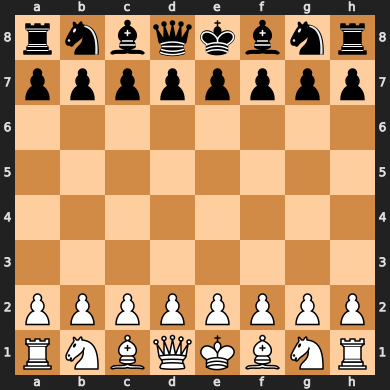

In [3]:
print(board)
board

In [4]:
for move in board.legal_moves:
    print(move)

g1h3
g1f3
b1c3
b1a3
h2h3
g2g3
f2f3
e2e3
d2d3
c2c3
b2b3
a2a3
h2h4
g2g4
f2f4
e2e4
d2d4
c2c4
b2b4
a2a4


In [4]:
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


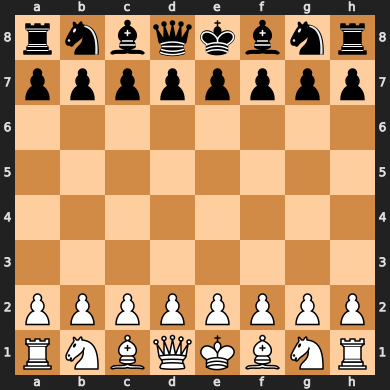

In [5]:
print(board)
board

In [6]:
import random
def play_random(fen):
    # We can create a python-chess board instance from the FEN string like this:
    board = chess.Board(fen=fen)

    # And then randomly pick a legal move:
    move = random.choice(list(board.legal_moves))

    # Now we turn our move into a string, return it and call it a day!
    return str(move)

In [7]:
import numpy as np

def one_hot_encode_peice(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

# Let's test on a black bishop
one_hot_encode_peice('b')

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# encode the entire board
def encode_board(board):
    # first lets turn the board into a string
    board_str = str(board)
    # then lets remove all the spaces
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_peice(piece))
        board_list.append(row_list)
    return np.array(board_list)

# Let's test on the starting board
encode_board(chess.Board())

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

    

In [9]:
import pandas as pd

df = pd.read_csv('dataset/train.csv')

val_df = df[-1000:]
# train_df.head()

In [10]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

# We'll stack all our encoded boards into a single numpy array
X_train = np.stack(df['board'].apply(encode_fen_string))
y_train = df['black_score']

X_val = np.stack(val_df['board'].apply(encode_fen_string))
y_val = val_df['black_score']

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# With the Keras Sequential model we can stack neural network layers together
model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

2023-05-03 00:22:56.641095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_val, y_val))

Epoch 1/20
1838/1838 [==============================] - 13s 6ms/step - loss: 154829.4844 - val_loss: 144377.2031
Epoch 2/20
1838/1838 [==============================] - 10s 6ms/step - loss: 138989.4219 - val_loss: 133574.0781
Epoch 3/20
1838/1838 [==============================] - 13s 7ms/step - loss: 130204.8359 - val_loss: 126039.5469
Epoch 4/20
1838/1838 [==============================] - 11s 6ms/step - loss: 124174.2500 - val_loss: 119790.5391
Epoch 5/20
1838/1838 [==============================] - 7s 4ms/step - loss: 119956.0078 - val_loss: 115391.2500
Epoch 6/20
1838/1838 [==============================] - 8s 4ms/step - loss: 116870.4219 - val_loss: 112050.1094
Epoch 7/20
1838/1838 [==============================] - 10s 6ms/step - loss: 114547.6797 - val_loss: 109165.1328
Epoch 8/20
1838/1838 [==============================] - 7s 4ms/step - loss: 112720.2109 - val_loss: 107737.9219
Epoch 9/20
1838/1838 [==============================] - 7s 4ms/step - loss: 111193.1094 - val_loss:

In [13]:
def play_nn(fen, show_move_evaluations=False, player='b'):
    # We can create a python-chess board instance from the FEN string like this:
    board = chess.Board(fen=fen)

    # And then evaluate all legal moves
    moves = []
    for move in board.legal_moves:
        # For each move, we'll make a copy of the board and try that move out
        candidate_board = board.copy()
        candidate_board.push(move)
        input_vector = encode_board(str(candidate_board)).astype(np.int32).flatten()
        
        # This is where our model gets to shine! It tells us how good the resultant score board is for black:
        score = model.predict(np.expand_dims(input_vector, axis=0), verbose=0)[0][0]
        moves.append((score, move))
        if show_move_evaluations:
            print(f'{move}: {score}')
    
    # By default sorting our moves will put the lowest scores at the top.
    # This would give us the right answer if we were playing as white,
    # but if we're playing as black we want to reverse things (then grab the first move):
    best_move = sorted(moves, reverse=player=='b')[0][1]

    # Now we turn our move into a string, return it and call it a day!
    return str(best_move)

In [1]:
from IPython.display import SVG, display

# Our play function accepts whatever strategy our AI is using, like play_random from above
def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:
        # We print out the board as an SVG
        display(SVG(board._repr_svg_()))

        # If it's white's turn, we have the user play
        if board.turn == chess.WHITE:
            user_move = input('Your move: ')
            if user_move == 'quit':
                break
            # The move a user puts in isn't a valid move, we keep prompting them for a valid move
            while user_move not in [str(move) for move in board.legal_moves]:
                print('That wasnt a valid move. Please enter a move in Standard Algebraic Notation')
                user_move = input('Your move: ')
            board.push_san(user_move)

        # If it's black's turn, we have the AI play
        elif board.turn == chess.BLACK:
            ai_move = ai_function(board.fen())
            print(f'AI move: {ai_move}')
            board.push_san(ai_move)
    print(board.outcome())
        
# play_game(play_random)

In [ ]:
# play_game(play_nn)
# ^^To play the game against the computer till someone wins